In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
%matplotlib inline

## Utility functions

Truth model

In [2]:
def truth_model(X, theta):
    y_truth = np.dot(X,theta)
    return y_truth

Noise

In [3]:
def gaussian_noise(mean, sigma, size):
    noise = scipy.stats.norm.rvs(mean, sigma, size)
    return noise

Generating observed y points

In [192]:
def generate_y_points(X, theta, noise=False, noise_mean=0.0, noise_sigma=0.1):
    t = truth_model(X,theta)
    if noise:
        n = gaussian_noise(noise_mean, noise_sigma, size=len(t))
        y = t + n
    else:
        y = t
    return y

Hypothesis

In [193]:
def hypothesis(X, theta):
    h = np.dot(X,theta)
    return h

Create design matrix with polynomial feautues

In [194]:
def create_design_matrix_poly(x, npol):
    nsamples = len(x)
    nfeatures = npol+1
    xvec = np.array(x)
    X = np.zeros((nsamples, nfeatures))
    X[:,0] = 1
    X[:,1] = xvec.T
    for col in range(2,nfeatures):
        X[:,col] = xvec**col 
    return X

Calculate the optimal $\theta$ using the normal equation

In [195]:
def calc_theta_opt_via_norm_eq(X, y, lam):
    nsamples, nfeatures = np.shape(X)
    L = np.identity(nfeatures)*lam
    L[0,0] = 0
    theta = np.dot(np.dot( np.linalg.inv(np.dot(X.T,X) + L), X.T), y)
    return theta

Calculate the value of the cost function

In [196]:
def calc_cost_model(X, theta, y_obs, lam):
    y_model = hypothesis(X, theta)
    D = y_obs - y_model
    cost = 0.5*np.dot(D.T,D) + lam*np.dot(theta.T,theta)
    return cost

Best fit model y predictions

In [197]:
def y_best_fit_model(X, y, lam):
    theta_best = calc_theta_opt_via_norm_eq(X, y, lam)
    y_best = hypothesis(X,theta_best)
    return y_best

Generate an ensemble of datasets and determine for each datasets the:
- y best fit prediction
- $\theta_{best}$
- cost value

In [282]:
def generate_best_fit_model_ensemble(X, lam, ntrials):
    y_ensemble = np.array([generate_y_points(X, theta_truth, noise=True) for i in range(ntrials)])
    y_best_ensemble = np.array([y_best_fit_model(X, y, lam) for y in y_ensemble])
    theta_opt_ensemble = np.array([calc_theta_opt_via_norm_eq(X,y,lam) for y in y_ensemble])
    cost_ensemble = np.array([calc_cost(X, theta, y_obs, lam) for theta, y_obs in zip(theta_opt_ensemble, y_ensemble)])
    return y_ensemble, theta_opt_ensemble, y_best_ensemble, cost_ensemble

In [257]:
def show_example_for_fit(y_ensemble, y_best_fit_ensemble, index):
    f,a = plt.subplots()
    a.scatter(x, y_ensemble[index], c='b', label='sample', alpha=0.3)
    a.plot(x, y_best_fit_ensemble[index], marker='o', c='r', label='predicted')
    a.plot(x, y_truth, c='k', label='truth')
    return f,a

## Truth model

Create features

In [258]:
#x = np.linspace(0.0, 2.0, 10)
x = scipy.stats.uniform.rvs(scale=2, size=10)

In [259]:
x = sorted(x)
x

[0.062403887879917352,
 0.48427240490593371,
 0.85387803901655079,
 0.85993862271873667,
 0.93640359369107729,
 1.0051897066455795,
 1.1011750724575045,
 1.1987309310455283,
 1.2946727894704813,
 1.8954578825322279]

In [260]:
X = create_design_matrix_poly(x, npol=1)

Truth parameters

In [261]:
#theta_0 = [1.0, 2.0, 0.0, 0.0]

In [262]:
theta_truth = [1.0, 2.0]

Truth y values

In [263]:
y_truth  = generate_y_points(X, theta_truth, noise=False)

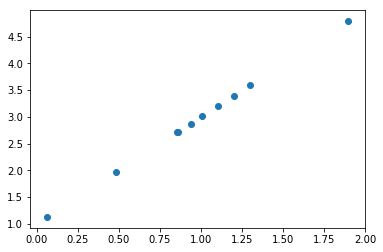

In [264]:
f,a = plt.subplots()
a.scatter(x,y_truth)

## Ensemble of observations

Generate ensemble of observed y values

In [265]:
nsamples = 100
y_ensemble = [generate_y_points(X, theta_truth, noise=True) for i in range(nsamples)]

Calculate the best fit models to these

In [266]:
y_best_fit_ensemble = [y_best_fit_model(X, y_sample, lam=0.0) for y_sample in y_ensemble]

In [267]:
x

[0.062403887879917352,
 0.48427240490593371,
 0.85387803901655079,
 0.85993862271873667,
 0.93640359369107729,
 1.0051897066455795,
 1.1011750724575045,
 1.1987309310455283,
 1.2946727894704813,
 1.8954578825322279]

In [268]:
y_best_fit_ensemble[0]

array([ 1.10725764,  1.95313404,  2.69421964,  2.70637154,  2.85968925,
        2.9976103 ,  3.19006779,  3.38567423,  3.57804448,  4.78266135])

(<matplotlib.figure.Figure at 0x7f4cb55fd710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4cb50fe2e8>)

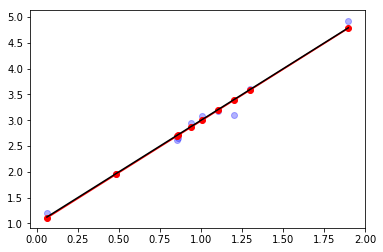

In [269]:
show_example_for_fit(y_ensemble, y_best_fit_ensemble, 0)

(<matplotlib.figure.Figure at 0x7f4cb5047b38>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4cb502e860>)

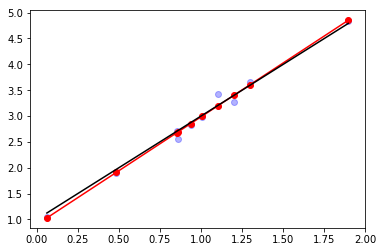

In [270]:
show_example_for_fit(y_ensemble, y_best_fit_ensemble, 1)

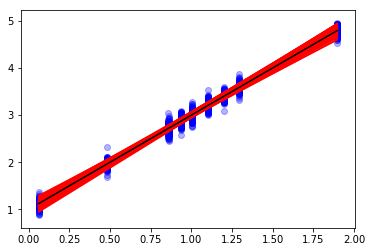

In [271]:
f,a = plt.subplots()
for h,y in list(zip(y_best_fit_ensemble,y_ensemble))[:100]:
    a.scatter(x, y, c='b', label='sample', alpha=0.3)
    a.plot(x, h, c='r', label='predicted')
a.plot(x, y_truth, c='k', label='truth')
#plt.legend()

In [272]:
lambdas = [0.0, 0.1, 1.0, 2.0]

In [273]:
results = {}

In [274]:
for lam in lambdas:
    results[lam] = {}
    y, t, h, c = generate_best_fit_model_ensemble(X, y_truth, lam=lam, ntrials=1000)
    results[lam]['y'] = y
    results[lam]['t'] = t
    results[lam]['h'] = h
    results[lam]['c'] = c

In [275]:
def comparison_plot(results, comparison_type, index=None, bins=50):
    f,a = plt.subplots()
    for lam, r in results.items():
        if index is None:
            values = r[comparison_type]
        else:
            values = r[comparison_type][:,index]
        label = r"$\lambda$ = {}".format(lam)
        a.hist(values, bins=bins, label=label)
    plt.legend()
    return f,a

## Distribution of the ensembles

### Cost

(<matplotlib.figure.Figure at 0x7f4cb4b708d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4cb4b7a470>)

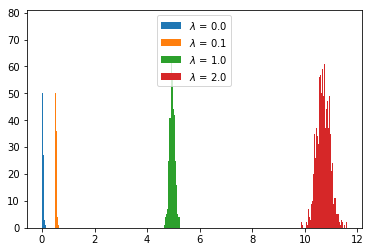

In [276]:
comparison_plot(results, 'c')

In [279]:
S_grid = np.linspace(0, 5, 100)
y_chi2 = scipy.stats.chi2.pdf(xgrid, df=1)

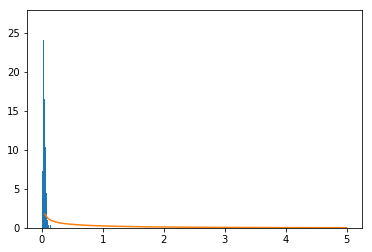

In [280]:
f,a = plt.subplots()
a.hist(results[0]['c'], bins=50, normed=True)
a.plot(S_grid, y_chi2)

### $\theta_{0}$

(<matplotlib.figure.Figure at 0x7f4cb8e595c0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4cba2460f0>)

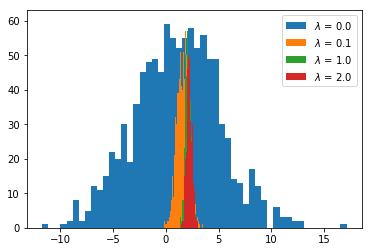

In [180]:
comparison_plot(results, 't', 0)

### $\theta_{1}$

(<matplotlib.figure.Figure at 0x7f4cbb1a5898>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4cbb1be898>)

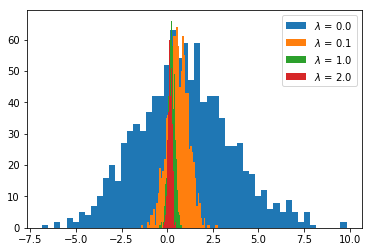

In [72]:
comparison_plot(results, 't', 1)

In [73]:
lam = 0.0

In [74]:
def show_pts(results, lam, ntrials):
    f,a = plt.subplots()
    for h,y in list(zip(results[lam]['h'], zip(results[lam]['y'])))[:ntrials]:
        a.plot(x, h, c='r', label='predicted')
        a.scatter(x, y, c='b', alpha=0.3)
    a.plot(x, y_truth, c='k', label='truth')
    return f,a

(<matplotlib.figure.Figure at 0x7f4cbafbc470>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4cbaf90c18>)

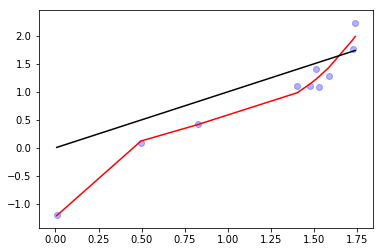

In [75]:
show_pts(results, lam=0.0, ntrials=1)

(<matplotlib.figure.Figure at 0x7f4cbb01bdd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4cbaca73c8>)

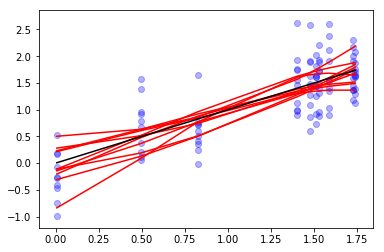

In [76]:
show_pts(results, lam=0.1, ntrials=10)

(<matplotlib.figure.Figure at 0x7f4cbabd8dd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4cbab66320>)

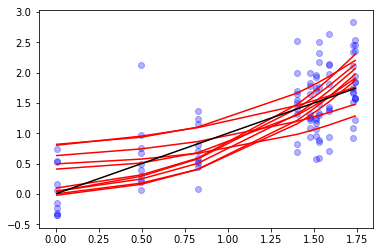

In [77]:
show_pts(results, lam=1.0, ntrials=10)

(<matplotlib.figure.Figure at 0x7f4cbaa5f9e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4cbaad4908>)

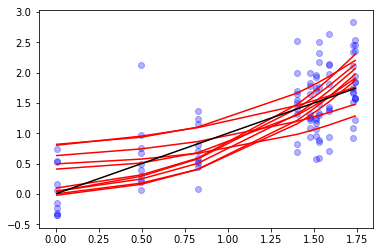

In [78]:
show_pts(results, lam=1.0, ntrials=10)